In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [4]:
cs = pd.read_csv('C:/Users/alcls/OneDrive - dongguk.edu/바탕 화면/미래에셋/cluster_cs.csv', low_memory=False)

In [14]:
cs_f = cs[cs['자산규모'] == '1만 < < 100만'] 

In [5]:
selected_columns = ['DAY_TR_RATIO', 'SWING_TR_RATIO', 'MONTHS_TR_RATIO', 
                    'MID_TR_RATIO', 'HLD_TR_RATIO', 'YEARS_TR_RATIO', 
                    'CASH_AST_M4', 'DMST_AST_EVAL_M4', '체결횟수_M4', 
                    '매수매도종목수', 'DMST_ITM_CNT_M4', '자산규모']

cl_cs = cs[selected_columns].copy()
cl_cs.fillna(0, inplace=True)



In [6]:
cl_cs_filtered = cl_cs[cl_cs['자산규모'] == '1만 < < 100만'] 
cl_cs_filtered .drop('자산규모', axis=1, inplace=True)
# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_filtered)

np.random.seed(42)
# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=16)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 군집 번호 지정
cl_cs_filtered['Cluster1'] = dbscan_labels


num_clusters = len(np.unique(dbscan_labels)) 


<ipython-input-6-9e22dc25d29f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_cs_filtered .drop('자산규모', axis=1, inplace=True)
<ipython-input-6-9e22dc25d29f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_cs_filtered['Cluster1'] = dbscan_labels


"\n# Visualize the clusters\nplt.scatter(X['BUY_CNT'], X['SEL_CNT'], c=dbscan_labels, cmap='viridis')\nplt.xlabel('BUY_CNT')\nplt.ylabel('SEL_CNT')\nplt.title('DBSCAN Clustering')\nplt.show()\n"

In [7]:
num_clusters = len(np.unique(dbscan_labels)) 

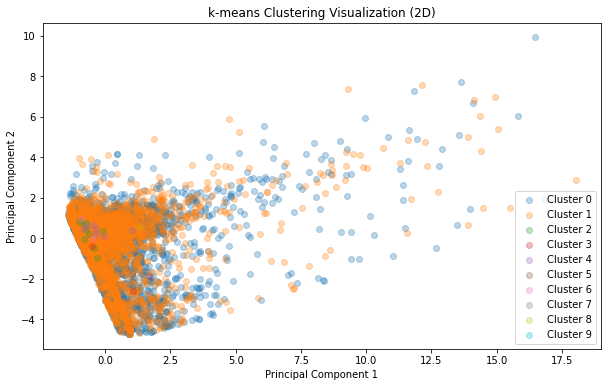

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster1'] = cl_cs_filtered['Cluster1']

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster1'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-means Clustering Visualization (2D)')
plt.legend()
plt.show()

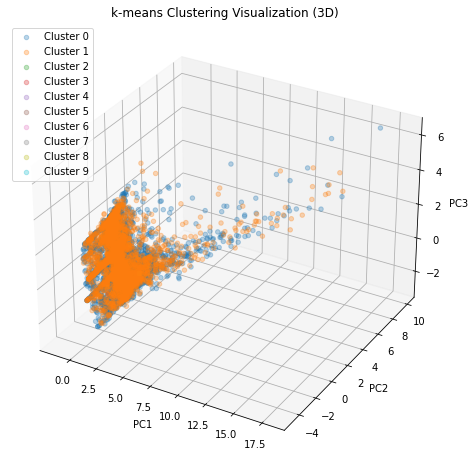

In [30]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster1'] = cl_cs_filtered['Cluster1']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster1'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],label=f'Cluster {cluster_num}', alpha=0.3)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('k-means Clustering Visualization (3D)')
plt.legend()
plt.show()

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio of PC1: {explained_variance_ratio[0]:.4f}")
print(f"Explained Variance Ratio of PC2: {explained_variance_ratio[1]:.4f}")
print(f"Explained Variance Ratio of PC3: {explained_variance_ratio[2]:.4f}")

Explained Variance Ratio of PC1: 0.2100
Explained Variance Ratio of PC2: 0.1682
Explained Variance Ratio of PC3: 0.1147


In [19]:
pca_result

array([[-0.23369125, -1.10038673, -1.01533436],
       [ 5.34314261, -3.15592025,  1.07537115],
       [-0.20261455,  0.65588379, -0.08212987],
       ...,
       [-0.94606967,  1.3109505 , -0.12425903],
       [ 0.39938941, -0.65260103, -0.63431664],
       [-0.69107913,  0.21654093, -0.16989796]])

In [9]:
cluster_statistics = []
grouped_cs = cl_cs_filtered.groupby('Cluster1')
# Iterate through each cluster and calculate the statistics
for cluster_label, cluster_data in grouped_cs:
    cluster_stat = {
        'Cluster': cluster_label,
        'Number of data points': len(cluster_data),
        'Mean of DAY_TR_RATIO': cluster_data['DAY_TR_RATIO'].mean(),
        'Mean of SWING_TR_RATIO': cluster_data['SWING_TR_RATIO'].mean(),
        'Mean of MONTHS_TR_RATIO': cluster_data['MONTHS_TR_RATIO'].mean(),
        'Mean of MID_TR_RATIO': cluster_data['MID_TR_RATIO'].mean(),
        'Mean of HLD_TR_RATIO': cluster_data['HLD_TR_RATIO'].mean(),
        'Mean of YEARS_TR_RATIO': cluster_data['YEARS_TR_RATIO'].mean(),
        'Mean of CASH_AST_M4': cluster_data['CASH_AST_M4'].mean(),
        'Mean of DMST_AST_EVAL_M4': cluster_data['DMST_AST_EVAL_M4'].mean(),
        'Mean of 체결횟수_M4': cluster_data['체결횟수_M4'].mean(),
        'Mean of 매수매도종목수': cluster_data['매수매도종목수'].mean(),
        'Mean of DMST_ITM_CNT_M4': cluster_data['DMST_ITM_CNT_M4'].mean(),
    }
    cluster_statistics.append(cluster_stat)

# Create a DataFrame from the cluster statistics list
cluster_statistics_df = pd.DataFrame(cluster_statistics)

cluster_statistics_df.drop('Cluster', axis=1, inplace=True)

In [10]:
cluster_statistics_df

,Number of data points,Mean of DAY_TR_RATIO,Mean of SWING_TR_RATIO,Mean of MONTHS_TR_RATIO,Mean of MID_TR_RATIO,Mean of HLD_TR_RATIO,Mean of YEARS_TR_RATIO,Mean of CASH_AST_M4,Mean of DMST_AST_EVAL_M4,Mean of 체결횟수_M4,Mean of 매수매도종목수,Mean of DMST_ITM_CNT_M4
0,14944,0.200294,0.217472,0.171995,0.191843,0.109268,0.096112,2.254364e+06,5.277411e+06,132.115297,35.881223,9.402637
1,46970,0.044829,0.122402,0.106723,0.278908,0.206683,0.238088,1.126164e+06,6.225686e+06,5.939706,3.142346,4.720758
2,34535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.521007e+05,6.367378e+06,1.526770,0.958477,4.646619
3,81,0.508642,0.377778,0.075309,0.019753,0.001235,0.001235,6.274074e+06,6.354321e+04,10.814815,5.802469,0.246914
4,19,0.000000,0.515789,0.010526,0.473684,0.000000,0.000000,6.873684e+06,1.321579e+05,2.052632,1.210526,0.315789
5,51,0.139216,0.496078,0.205882,0.137255,0.015686,0.001961,9.439216e+06,6.315686e+04,8.215686,4.254902,0.156863
6,7,0.300000,0.071429,0.100000,0.500000,0.000000,0.000000,8.187286e+05,4.928571e+06,8.857143,2.285714,3.428571
7,15,0.720000,0.233333,0.013333,0.013333,0.000000,0.000000,9.266667e+06,0.000000e+00,8.600000,5.533333,0.000000
8,14,0.000000,0.285714,0.292857,0.050000,0.007143,0.321429,3.614143e+04,6.214286e+06,0.642857,0.571429,2.000000
9,5,0.000000,0.020000,0.240000,0.040000,0.320000,0.320000,3.489200e+05,6.120000e+06,4.800000,3.800000,2.400000


In [16]:
cs_f['cluster'] = cl_cs_filtered['Cluster1']

cluster0 = cs_f[cs_f['cluster'] == 0]
cluster1 = cs_f[cs_f['cluster'] == 1]
cluster2 = cs_f[cs_f['cluster'] == 2]
cluster3 = cs_f[cs_f['cluster'] == 3]
cluster4 = cs_f[cs_f['cluster'] == 4]
cluster5 = cs_f[cs_f['cluster'] == 5]
cluster6 = cs_f[cs_f['cluster'] == 6]
cluster7 = cs_f[cs_f['cluster'] == 7]
cluster8 = cs_f[cs_f['cluster'] == 8]
cluster9 = cs_f[cs_f['cluster'] == 9]

<ipython-input-16-25f6f03c2981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_f['cluster'] = cl_cs_filtered['Cluster1']


In [66]:
selected_columns = ['이율_M4', '평균이율','CASH_AST_M4', 'DMST_AST_EVAL_M4']

cl_cs_0 = cluster1[selected_columns].copy()
cl_cs_0['이율_M4'] = cl_cs_0['이율_M4'].replace([np.inf, -np.inf], 0)
cl_cs_0['평균이율'] = cl_cs_0['평균이율'].replace([np.inf, -np.inf], 0)
cl_cs_0.fillna(0, inplace=True)

In [ ]:

# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_0)

np.random.seed(42)
# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=15)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 군집 번호 지정
cl_cs_0['Cluster'] = dbscan_labels


num_clusters = len(np.unique(dbscan_labels)) 



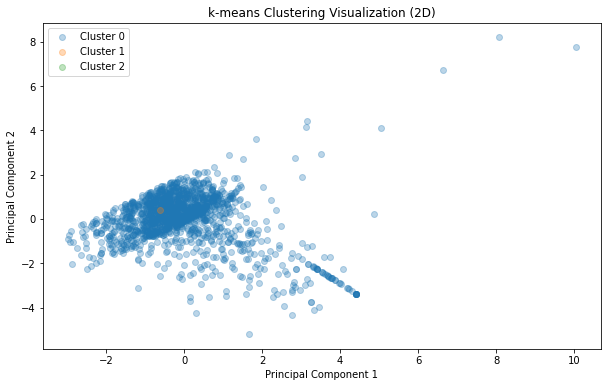

In [68]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cl_cs_0['Cluster']

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-means Clustering Visualization (2D)')
plt.legend()
plt.show()

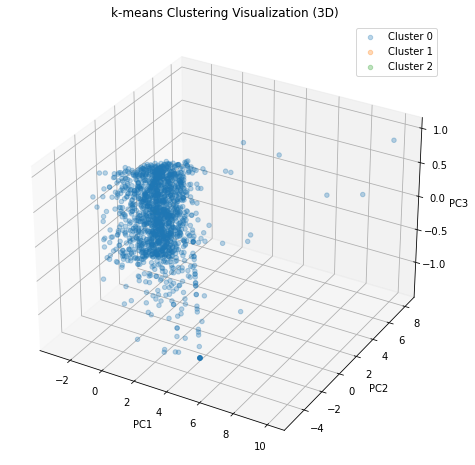

In [69]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cl_cs_0['Cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],label=f'Cluster {cluster_num}', alpha=0.3)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('k-means Clustering Visualization (3D)')
plt.legend()
plt.show()

In [70]:
cluster_statistics = []
grouped_cs = cl_cs_0.groupby('Cluster')
# Iterate through each cluster and calculate the statistics
for cluster_label, cluster_data in grouped_cs:
    cluster_stat = {
        'Cluster': cluster_label,
        'Number of data points': len(cluster_data),
        'Mean of 이율_M4': cluster_data['이율_M4'].mean(),
        'Mean of 평균이율': cluster_data['평균이율'].mean(),
        'Mean of CASH_AST_M4': cluster_data['CASH_AST_M4'].mean(),
        'Mean of DMST_AST_EVAL_M4': cluster_data['DMST_AST_EVAL_M4'].mean()
    }
    cluster_statistics.append(cluster_stat)

# Create a DataFrame from the cluster statistics list
pd.DataFrame(cluster_statistics)

,Cluster,Number of data points,Mean of 이율_M4,Mean of 평균이율,Mean of CASH_AST_M4,Mean of DMST_AST_EVAL_M4
0,-1,164,159.476886,101.724109,2.178349e+06,4.905994e+06
1,0,34360,-19.930379,-23.363735,9.464792e+05,6.373531e+06
2,1,11,72.504070,77.750981,2.296364e+05,8.936364e+06


## CLUSTER 1

In [18]:
cluster1.describe()

,접속일수_M4,총자산액_M4,체결횟수_M4,매수매도종목수,이율_M4,평균이율,DMST_ITM_CNT_M4,CASH_AST_M4,DMST_AST_EVAL_M4,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO,cluster
count,34535.000000,3.453500e+04,34535.000000,34535.000000,3.355500e+04,3.327400e+04,34535.000000,3.453500e+04,3.453500e+04,34535.0,34535.0,34535.0,34535.0,34535.0,34535.0,34535.0
mean,11.911597,7.319479e+06,1.526770,0.958477,inf,inf,4.646619,9.521007e+05,6.367378e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,8.582741,1.464964e+06,5.926376,2.846106,NaN,NaN,4.228213,1.877219e+06,2.215913e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,5.000012e+06,0.000000,0.000000,-9.826190e+01,-9.851190e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,4.000000,6.019000e+06,0.000000,0.000000,-3.250000e+01,-3.477273e+01,2.000000,1.700000e+04,5.300000e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,10.000000,7.201000e+06,0.000000,0.000000,-1.911765e+01,-2.286585e+01,3.000000,1.000000e+05,6.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,20.000000,8.569000e+06,1.000000,1.000000,-7.462687e+00,-1.277149e+01,6.000000,8.400000e+05,8.000000e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,31.000000,1.000000e+07,163.000000,56.000000,inf,inf,46.000000,1.000000e+07,1.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
cluster1.head()

,접속일수_M4,총자산액_M4,체결횟수_M4,매수매도종목수,이율_M4,평균이율,DMST_ITM_CNT_M4,CASH_AST_M4,DMST_AST_EVAL_M4,DAY_TR_RATIO,...,BUY2_ITM_M4_2,BUY2_ITM_M4_3,BUY3_ITM_M4_1,BUY3_ITM_M4_2,BUY3_ITM_M4_3,DMST_AST1_ITM_M4,DMST_AST2_ITM_M4,DMST_AST3_ITM_M4,자산규모,cluster
18,15,6893000,0,0,-19.047619,-25.000000,6,93000,6800000,0.0,...,NaN,NaN,NaN,NaN,NaN,005935,5490.0,005385,500만원 < < 1000만원,1
59,5,8210000,2,2,-1.282051,-6.009479,6,510000,7700000,0.0,...,005930,NaN,NaN,NaN,NaN,005930,34810.0,048410,500만원 < < 1000만원,1
62,22,5800000,0,0,-46.000000,-46.000000,3,400000,5400000,0.0,...,NaN,NaN,NaN,NaN,NaN,068270,67160.0,303530,500만원 < < 1000만원,1
102,4,7380000,2,2,11.290323,-5.771169,2,480000,6900000,0.0,...,NaN,NaN,NaN,NaN,NaN,005380,68270.0,NaN,500만원 < < 1000만원,1
104,22,8585000,0,0,-9.574468,-36.816694,1,85000,8500000,0.0,...,NaN,NaN,NaN,NaN,NaN,090710,NaN,NaN,500만원 < < 1000만원,1


In [30]:
selected_columns = ['이율_M4', '평균이율','CASH_AST_M4', 'DMST_AST_EVAL_M4']

cl_cs_1 = cluster1[selected_columns].copy()
cl_cs_1['이율_M4'] = cl_cs_1['이율_M4'].replace([np.inf, -np.inf], 0)
cl_cs_1['평균이율'] = cl_cs_1['평균이율'].replace([np.inf, -np.inf], 0)
cl_cs_1.fillna(0, inplace=True)

In [25]:
cl_cs_1

,이율_M4,평균이율,CASH_AST_M4,DMST_AST_EVAL_M4
18,-19.048,-25.000,93000,6800000
59,-1.282,-6.009,510000,7700000
62,-46.000,-46.000,400000,5400000
102,11.290,-5.771,480000,6900000
104,-9.574,-36.817,85000,8500000
...,...,...,...,...
803216,-16.667,-20.417,39000,5000000
803236,-41.538,-40.385,4200,7600000
803274,9.877,2.298,550000,8900000
803294,-23.846,-27.308,77000,9900000


In [48]:

# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_1)

np.random.seed(42)
# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=15)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 군집 번호 지정
cl_cs_1['Cluster'] = dbscan_labels


num_clusters = len(np.unique(dbscan_labels)) 



In [49]:
num_clusters

2

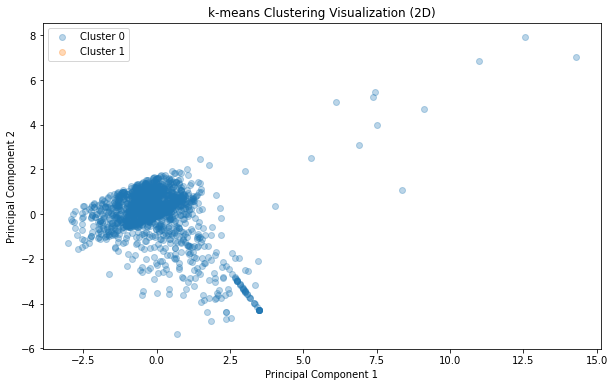

In [50]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cl_cs_1['Cluster']

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-means Clustering Visualization (2D)')
plt.legend()
plt.show()

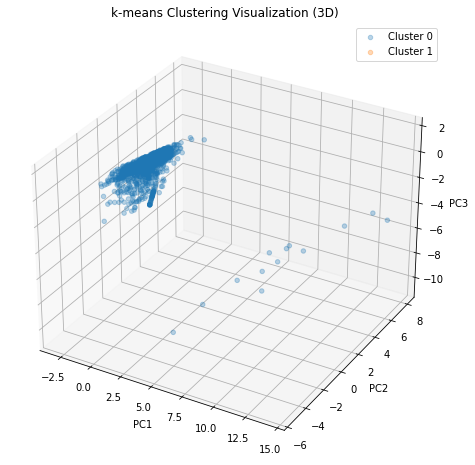

In [51]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cl_cs_1['Cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],label=f'Cluster {cluster_num}', alpha=0.3)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('k-means Clustering Visualization (3D)')
plt.legend()
plt.show()

In [52]:
cluster_statistics = []
grouped_cs = cl_cs_1.groupby('Cluster')
# Iterate through each cluster and calculate the statistics
for cluster_label, cluster_data in grouped_cs:
    cluster_stat = {
        'Cluster': cluster_label,
        'Number of data points': len(cluster_data),
        'Mean of 이율_M4': cluster_data['이율_M4'].mean(),
        'Mean of 평균이율': cluster_data['평균이율'].mean(),
        'Mean of CASH_AST_M4': cluster_data['CASH_AST_M4'].mean(),
        'Mean of DMST_AST_EVAL_M4': cluster_data['DMST_AST_EVAL_M4'].mean()
    }
    cluster_statistics.append(cluster_stat)

# Create a DataFrame from the cluster statistics list
pd.DataFrame(cluster_statistics)

,Cluster,Number of data points,Mean of 이율_M4,Mean of 평균이율,Mean of CASH_AST_M4,Mean of DMST_AST_EVAL_M4
0,-1,303,93.624065,54.398708,2.408048e+06,5.028017e+06
1,0,34232,-20.046277,-23.420271,9.392136e+05,6.379233e+06


In [37]:

# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_1)

np.random.seed(42)
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 군집 번호 지정
cl_cs_1['Cluster'] = dbscan_labels


num_clusters = len(np.unique(dbscan_labels)) 

num_clusters

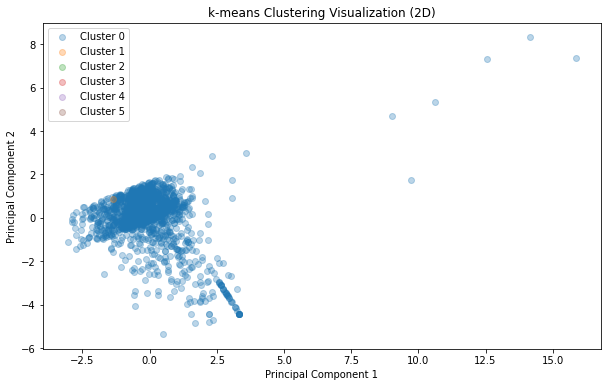

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cl_cs_1['Cluster']

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-means Clustering Visualization (2D)')
plt.legend()
plt.show()

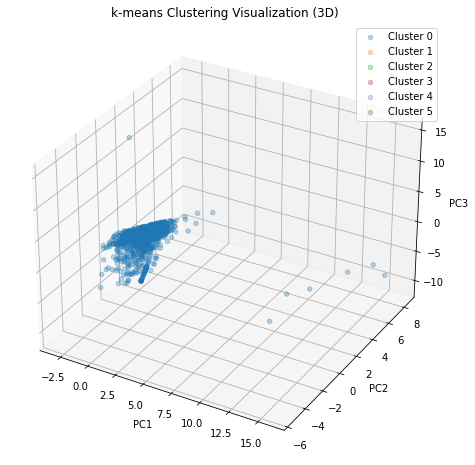

In [41]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cl_cs_1['Cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],label=f'Cluster {cluster_num}', alpha=0.3)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('k-means Clustering Visualization (3D)')
plt.legend()
plt.show()

In [40]:
cluster_statistics = []
grouped_cs = cl_cs_1.groupby('Cluster')
# Iterate through each cluster and calculate the statistics
for cluster_label, cluster_data in grouped_cs:
    cluster_stat = {
        'Cluster': cluster_label,
        'Number of data points': len(cluster_data),
        'Mean of 이율_M4': cluster_data['이율_M4'].mean(),
        'Mean of 평균이율': cluster_data['평균이율'].mean(),
        'Mean of CASH_AST_M4': cluster_data['CASH_AST_M4'].mean(),
        'Mean of DMST_AST_EVAL_M4': cluster_data['DMST_AST_EVAL_M4'].mean()
    }
    cluster_statistics.append(cluster_stat)

# Create a DataFrame from the cluster statistics list
pd.DataFrame(cluster_statistics)

,Cluster,Number of data points,Mean of 이율_M4,Mean of 평균이율,Mean of CASH_AST_M4,Mean of DMST_AST_EVAL_M4
0,-1,273,96.623754,55.761081,2.436017e+06,5.027725e+06
1,0,34236,-20.030929,-23.412482,9.391051e+05,6.379481e+06
2,1,5,98.620690,38.390247,9.084000e+04,5.400000e+06
3,2,4,-87.274306,-85.051764,3.550000e+06,2.250000e+06
4,3,9,88.647998,67.935863,5.444444e+06,8.355556e+05
5,4,8,75.338113,77.985253,1.137500e+05,9.175000e+06


### CLUSTER 2

In [42]:
selected_columns = ['이율_M4', '평균이율','CASH_AST_M4', 'DMST_AST_EVAL_M4']

cl_cs_2 = cluster2[selected_columns].copy()
cl_cs_2['이율_M4'] = cl_cs_2['이율_M4'].replace([np.inf, -np.inf], 0)
cl_cs_2['평균이율'] = cl_cs_2['평균이율'].replace([np.inf, -np.inf], 0)
cl_cs_2.fillna(0, inplace=True)

In [57]:

# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_2)

np.random.seed(42)
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 군집 번호 지정
cl_cs_2['Cluster'] = dbscan_labels


num_clusters = len(np.unique(dbscan_labels)) 

num_clusters

2

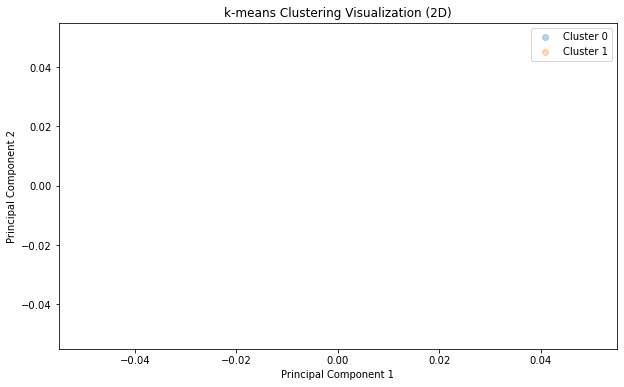

In [58]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cl_cs_2['Cluster']

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-means Clustering Visualization (2D)')
plt.legend()
plt.show()

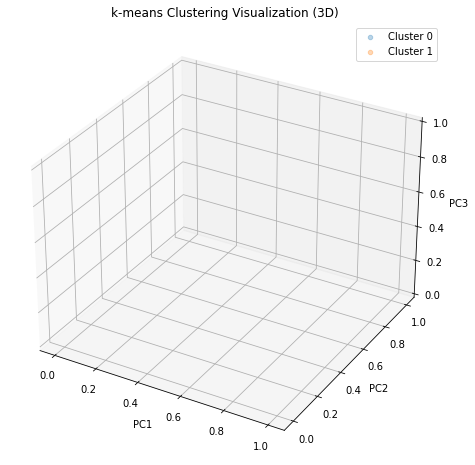

In [59]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cl_cs_2['Cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],label=f'Cluster {cluster_num}', alpha=0.3)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('k-means Clustering Visualization (3D)')
plt.legend()
plt.show()

In [60]:
cluster_statistics = []
grouped_cs = cl_cs_2.groupby('Cluster')
# Iterate through each cluster and calculate the statistics
for cluster_label, cluster_data in grouped_cs:
    cluster_stat = {
        'Cluster': cluster_label,
        'Number of data points': len(cluster_data),
        'Mean of 이율_M4': cluster_data['이율_M4'].mean(),
        'Mean of 평균이율': cluster_data['평균이율'].mean(),
        'Mean of CASH_AST_M4': cluster_data['CASH_AST_M4'].mean(),
        'Mean of DMST_AST_EVAL_M4': cluster_data['DMST_AST_EVAL_M4'].mean()
    }
    cluster_statistics.append(cluster_stat)

# Create a DataFrame from the cluster statistics list
pd.DataFrame(cluster_statistics)

,Cluster,Number of data points,Mean of 이율_M4,Mean of 평균이율,Mean of CASH_AST_M4,Mean of DMST_AST_EVAL_M4
0,-1,17,-8.094134,-9.724273,6.176471e+06,302764.705882
1,0,64,0.000000,0.000000,6.300000e+06,0.000000


In [62]:

# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_2)

np.random.seed(42)
# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 군집 번호 지정
cl_cs_2['Cluster'] = dbscan_labels


num_clusters = len(np.unique(dbscan_labels)) 

num_clusters

6

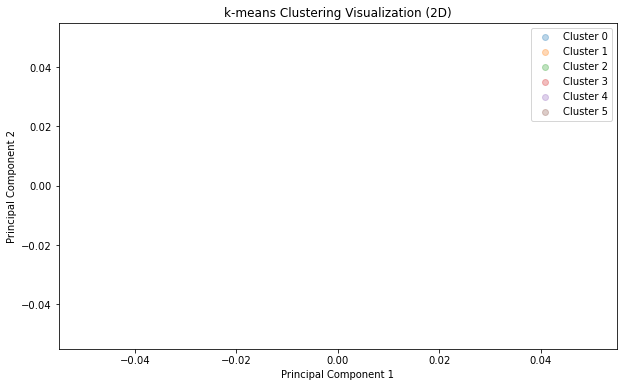

In [63]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cl_cs_2['Cluster']

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-means Clustering Visualization (2D)')
plt.legend()
plt.show()

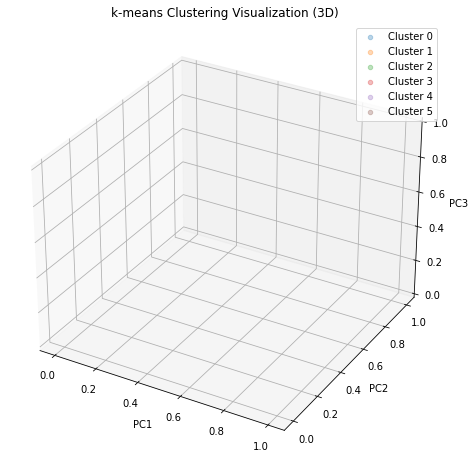

In [64]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cl_cs_2['Cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],label=f'Cluster {cluster_num}', alpha=0.3)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('k-means Clustering Visualization (3D)')
plt.legend()
plt.show()

In [65]:
cluster_statistics = []
grouped_cs = cl_cs_2.groupby('Cluster')
# Iterate through each cluster and calculate the statistics
for cluster_label, cluster_data in grouped_cs:
    cluster_stat = {
        'Cluster': cluster_label,
        'Number of data points': len(cluster_data),
        'Mean of 이율_M4': cluster_data['이율_M4'].mean(),
        'Mean of 평균이율': cluster_data['평균이율'].mean(),
        'Mean of CASH_AST_M4': cluster_data['CASH_AST_M4'].mean(),
        'Mean of DMST_AST_EVAL_M4': cluster_data['DMST_AST_EVAL_M4'].mean()
    }
    cluster_statistics.append(cluster_stat)

# Create a DataFrame from the cluster statistics list
pd.DataFrame(cluster_statistics)

,Cluster,Number of data points,Mean of 이율_M4,Mean of 평균이율,Mean of CASH_AST_M4,Mean of DMST_AST_EVAL_M4
0,-1,18,-7.64446,-9.184035,6.294444e+06,285944.444444
1,0,42,0.00000,0.000000,5.738095e+06,0.000000
2,1,5,0.00000,0.000000,6.660000e+06,0.000000
3,2,5,0.00000,0.000000,7.020000e+06,0.000000
4,3,8,0.00000,0.000000,7.662500e+06,0.000000
5,4,3,0.00000,0.000000,8.066667e+06,0.000000
